In [2]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [ ]:
#importing datasets
d1 =pd.read_csv("./dataset1.csv")
d1
d2 = pd.read_csv("./dataset2.csv")
d2

#d1 is dataset1 and d2 is dataset2

In [ ]:
#reading the dataset1, analyzing dtypes
print (d1.shape)
print (d1.head(5))
print (d1.tail())
print(d1.describe(include ="float64"))
print(d1.describe(include ="int64"))
print(d1.describe(include="object"))



Investigation B 
Do the behaviours described above change following seasonal changes? 
It is known that in winter, alternative food sources are scarce and rat encounters are less frequent. In spring, food is more abundant and rat encounters are more common. To provide answers to both investigations, your team should decide the appropriate data science techniques to use for analysing the following datasets.

In [6]:
#We must see if bat–rat interactions or bat behaviours differ by season.
#Bat behaviour (risk, reward, vigilance time)
#Rat activity (rat arrivals, rat minutes)
#Food availability and see if these vary noticeably between winter and spring.

In [16]:
#counting values for season column in d1
d1['season'].value_counts()

season
1    756
0    151
Name: count, dtype: int64

In [18]:
#grouping for seasonal statistical summary
d1.groupby('season')[['bat_landing_to_food', 'risk', 'reward']].mean()

,bat_landing_to_food,risk,reward
season,,,
0,6.039623,0.562914,0.364238
1,12.846335,0.481481,0.567460


In [24]:
#data cleaning
#finding missing values
d1.isnull().sum()
#let's fill missing values instead of dropping
d1= d1.fillna({'habit':'NA'})
#rechecking the missing values
d1.isnull().sum()



start_time                   0
bat_landing_to_food          0
habit                        0
rat_period_start             0
rat_period_end               0
seconds_after_rat_arrival    0
risk                         0
reward                       0
month                        0
sunset_time                  0
hours_after_sunset           0
season                       0
dtype: int64

In [27]:
#checking for duplicates:
dup1= print(d1.duplicated().sum())
dup2= print(d2.duplicated().sum())

1
0


In [28]:
# dropping the 1duplicate in dataset1
d1 = d1.drop_duplicates(keep='last')

#checking the update
dup1= print(d1.duplicated().sum())

0


In [30]:
#missing values of d2
d2.isnull().sum()

#output- 0 missing values


time                  0
month                 0
hours_after_sunset    0
bat_landing_number    0
food_availability     0
rat_minutes           0
rat_arrival_number    0
dtype: int64

In [33]:
#data merging
merged = pd.merge(d1, d2)  # merges on all columns that exist in both datasets by default

# Save the merged dataset to a new CSV file
merged.to_csv('merged_dataset.csv', index=False)

#check first few rows
print(merged.head())

        start_time  bat_landing_to_food habit rat_period_start  \
0  27/04/2018 2:17             0.063772   rat  27/04/2018 2:10   
1  27/04/2018 2:17             0.063772   rat  27/04/2018 2:10   
2  27/04/2018 2:17             0.063772   rat  27/04/2018 2:10   
3  27/04/2018 2:17             0.063772   rat  27/04/2018 2:10   
4  27/04/2018 2:17             0.063772   rat  27/04/2018 2:10   

    rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  27/04/2018 2:20                        368     1       0      4   
1  27/04/2018 2:20                        368     1       0      4   
2  27/04/2018 2:20                        368     1       0      4   
3  27/04/2018 2:20                        368     1       0      4   
4  27/04/2018 2:20                        368     1       0      4   

        sunset_time  hours_after_sunset  season             time  \
0  26/04/2018 19:17                 7.0       1   3/04/2018 2:01   
1  26/04/2018 19:17                 7.0       

In [ ]:
#cleaning the new(merged) dataset
#we'll work from this merged datset only

merged.isnull().sum()

#no null values

start_time                   0
bat_landing_to_food          0
habit                        0
rat_period_start             0
rat_period_end               0
seconds_after_rat_arrival    0
risk                         0
reward                       0
month                        0
sunset_time                  0
hours_after_sunset           0
season                       0
time                         0
bat_landing_number           0
food_availability            0
rat_minutes                  0
rat_arrival_number           0
dtype: int64

In [37]:
#checking for duplicates
merged.duplicated().sum()

#no duplicates either

np.int64(0)

In [39]:
#checking outliers
merged.describe()


,bat_landing_to_food,seconds_after_rat_arrival,risk,reward,month,hours_after_sunset,season,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
count,2.000000e+01,20.0,20.0,20.0,20.0,20.0,20.0,20.000000,20.000000,20.000000,20.000000
mean,6.377157e-02,368.0,1.0,0.0,4.0,7.0,1.0,61.950000,2.015515,2.050833,0.650000
std,1.423831e-17,0.0,0.0,0.0,0.0,0.0,0.0,31.698373,0.699437,4.356069,1.182103
min,6.377157e-02,368.0,1.0,0.0,4.0,7.0,1.0,25.000000,0.000000,0.000000,0.000000
25%,6.377157e-02,368.0,1.0,0.0,4.0,7.0,1.0,48.250000,2.000000,0.000000,0.000000
50%,6.377157e-02,368.0,1.0,0.0,4.0,7.0,1.0,62.500000,2.000000,0.000000,0.000000
75%,6.377157e-02,368.0,1.0,0.0,4.0,7.0,1.0,66.250000,2.000000,1.054167,1.000000
max,6.377157e-02,368.0,1.0,0.0,4.0,7.0,1.0,178.000000,3.000000,15.316667,4.000000


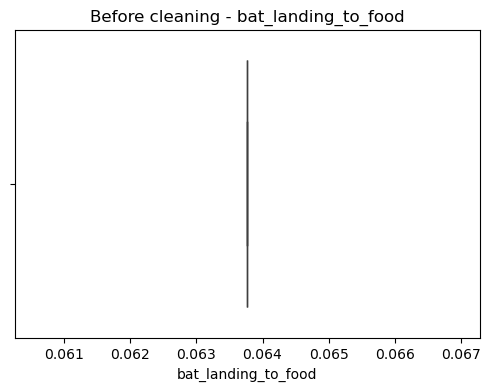

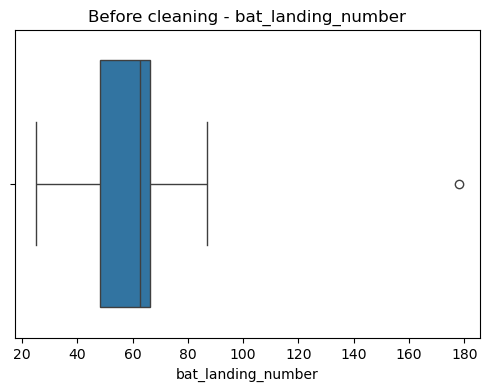

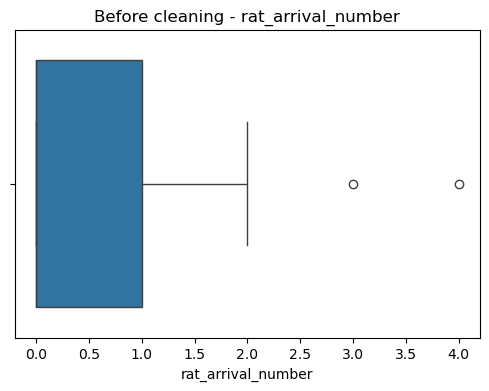

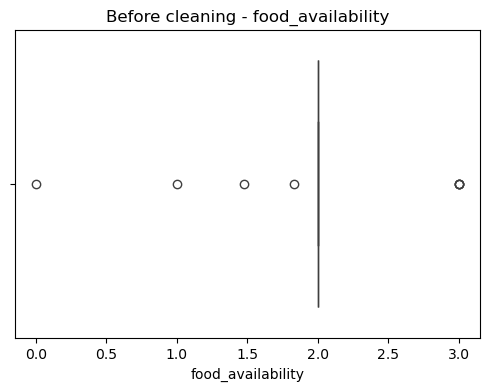

In [41]:
#IQR for outlier
#List of numeric columns to check for outliers
numeric_cols = ['bat_landing_to_food', 'bat_landing_number', 'rat_arrival_number', 'food_availability']

# Plot before removing outliers
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=merged[col])
    plt.title(f'Before cleaning - {col}')
    plt.show()



In [43]:
# Remove outliers using IQR
merged_clean = merged.copy()
for col in numeric_cols:
    Q1 = merged_clean[col].quantile(0.25)
    Q3 = merged_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    merged_clean = merged_clean[~((merged_clean[col] < (Q1 - 1.5 * IQR)) |
                                  (merged_clean[col] > (Q3 + 1.5 * IQR)))]

# Save cleaned dataset
merged_clean.to_csv('merged_clean.csv', index=False)


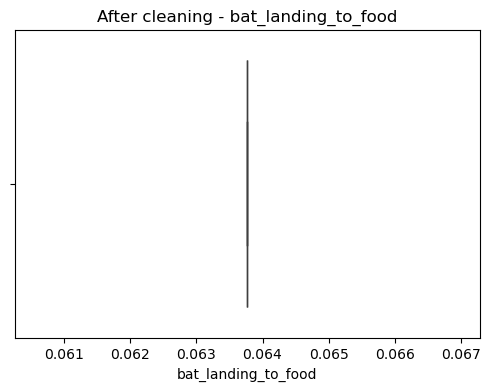

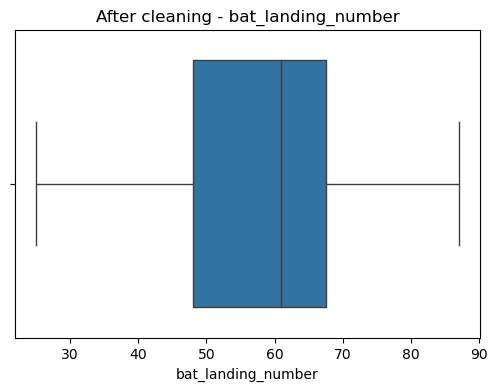

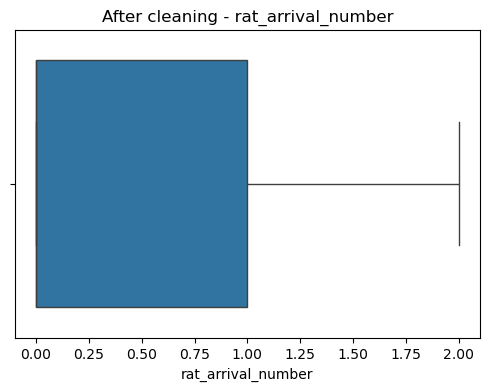

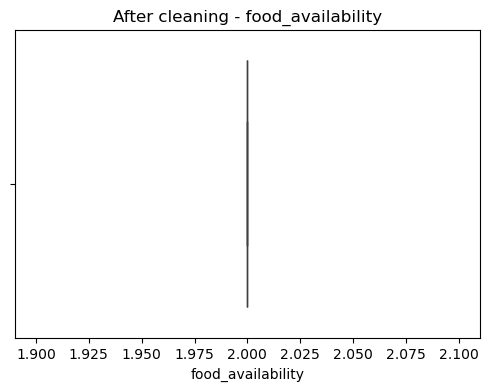

In [45]:
# Plot after removing outliers
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=merged_clean[col])
    plt.title(f'After cleaning - {col}')
    plt.show()

In [46]:
# comparing the before after
print("Original shape:", merged.shape)
print("Cleaned shape:", merged_clean.shape)

Original shape: (20, 17)
Cleaned shape: (11, 17)
